In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.initializers import Orthogonal
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.initializers import Orthogonal
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split


# Function to load data and labels
def load_data_and_labels(sector_number):
    base_path = f'/kaggle/input/sector{sector_number}'
    galaxy_folder = os.path.join(base_path, 'Augmented_Galaxy_Images', 'Augmented_Galaxy_Images')
    star_folder = os.path.join(base_path, 'Augmented_Star_Images', 'Augmented_Star_Images')
    
    # Adjust file names based on sector
    if sector_number == 16:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 10:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}_200.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}_200.csv')
    elif sector_number == 7:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 13:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'star_s{sector_number}.csv')

    # Load metadata from CSV files to ensure correct labeling
    galaxy_metadata = pd.read_csv(galaxy_csv, skiprows=1)
    star_metadata = pd.read_csv(star_csv, skiprows=1)

    images = []
    labels = []  # 0 for star, 1 for galaxy

    def extract_objid(filename):
        return filename.split('_')[-1].split('.')[0]

    for file in os.listdir(galaxy_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(galaxy_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(galaxy_folder, file))
                images.append(img)
                labels.append(1)

    for file in os.listdir(star_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(star_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(star_folder, file))
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load data from training sectors (16,7,13)
images16, labels16 = load_data_and_labels(16)
images7, labels7 = load_data_and_labels(7)
images13, labels13 = load_data_and_labels(13)

# Combine the data from the two training sectors
X_train = np.concatenate((images16, images7, images13))
y_train = np.concatenate((labels16, labels7, labels13))

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()

# Convolutional layer with 32 filters, 5x5 filter size
model.add(Conv2D(32, (5, 5), input_shape=(45, 45, 5), kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Convolutional layer with 32 filters, 3x3 filter size, padding of 1
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 filters, 3x3 filter size, padding of 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Convolutional layer with 64 filters, 3x3 filter size, padding of 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Convolutional layer with 64 filters, 3x3 filter size, padding of 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 filters, 3x3 filter size, padding of 1
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Convolutional layer with 128 filters, 3x3 filter size, padding of 1
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Convolutional layer with 128 filters, 3x3 filter size, padding of 1
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into the dense layers
model.add(Flatten())

# Fully connected layer with 2048 units
model.add(Dense(2048, kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Fully connected layer with 2048 units
model.add(Dense(2048, kernel_initializer=Orthogonal(), bias_initializer='zeros'))
model.add(LeakyReLU(alpha=0.1))

# Fully connected layer with 2 units (for binary classification)
model.add(Dense(1, activation='sigmoid', kernel_initializer=Orthogonal(), bias_initializer='zeros'))

 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Ensure labels are in the correct shape for binary_crossentropy
y_train = y_train.flatten()
y_val = y_val.flatten()

# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Load test data from sector 10
X_test, y_test = load_data_and_labels(10)
y_test = y_test.flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 41, 41, 32)        4032      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 41, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 41, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 41, 41, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                        

313/313 [==============================] - 23s 72ms/step


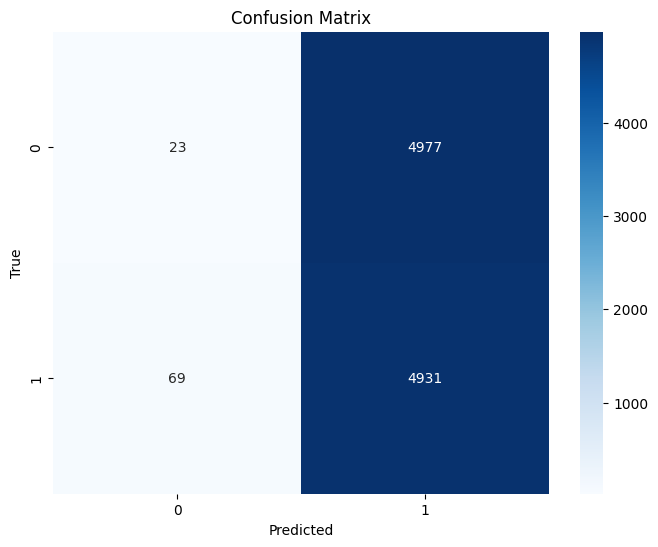

              precision    recall  f1-score   support

        Star       0.25      0.00      0.01      5000
      Galaxy       0.50      0.99      0.66      5000

    accuracy                           0.50     10000
   macro avg       0.37      0.50      0.34     10000
weighted avg       0.37      0.50      0.34     10000

Test Accuracy: 0.49540001153945923, Test Loss: 1782.330810546875


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Star', 'Galaxy'])
print(report)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")